In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
from sklearn.preprocessing import StandardScaler


### Met Goals Regression 

#### Reading, merging, and final cleaning of data

In [192]:
health_outcomes = pd.read_csv('oversampled_health_outcomes.txt')
health_outcomes.drop(columns = ['perc_lowbirth', 'perc_preterm']) #dropping features that are endogenous to the outcome variable

,county_name,population,pop_change_2010,perc_under_18,perc_csec,perc_prenat_1tri,perc_non_smoke,fert_15_44,birth_rate_15_19,birth_rate_20_24,...,perc_smoker,hiv_tested,perc_no_healthins,perc_obese,perc_routine_checkup,beds_per_1000,inpatient_occupancy_rate,admission_per_1000,Total_MetGoals,MetGoal_Reached
0,Clinton,38632.0,-1.5,19.5,27.3,68.8,82.9,52.5,15.2,50.3,...,21.0,33.0,8.0,36.0,89.0,0.6,27.9,19.0,2.0,1
1,Tioga,40591.0,-3.3,19.6,33.1,77.9,79.9,58.5,19.6,89.9,...,21.0,33.0,8.0,36.0,89.0,0.6,58.4,35.4,1.0,1
2,Warren,39191.0,-6.3,19.1,33.4,74.3,77.7,66.6,21.5,115.9,...,27.0,35.0,10.0,41.0,86.0,2.6,11.9,82.6,0.0,0
3,Wyoming,26794.0,-5.2,19.4,32.4,71.2,76.9,56.8,16.3,83.4,...,24.0,45.0,11.0,29.0,89.0,0.4,20.8,12.2,2.0,1
4,Potter,16526.0,-5.3,20.3,35.9,77.8,78.7,68.9,27.7,145.7,...,21.0,33.0,8.0,36.0,89.0,1.5,49.2,91.8,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,Carbon,64182.0,-1.6,19.2,29.8,74.9,79.0,56.1,17.8,84.8,...,18.0,45.0,6.0,32.0,89.0,1.7,56.9,57.8,0.0,0
242,Carbon,64182.0,-1.6,19.2,29.8,74.9,79.0,56.1,17.8,84.8,...,18.0,45.0,6.0,32.0,89.0,1.7,56.9,57.8,0.0,0
243,Luzerne,317417.0,-1.1,19.8,35.1,68.7,83.6,58.6,22.1,79.9,...,24.0,45.0,11.0,29.0,89.0,2.5,53.7,108.3,0.0,0
244,Dauphin,278299.0,3.8,22.3,30.4,71.6,88.4,64.7,22.0,88.7,...,20.0,42.0,16.0,32.0,87.0,4.1,77.3,223.0,0.0,0


In [193]:
#grabbing relevant features from adi dataset
adi = pd.read_csv('countyLevel_ACS_ADI.csv')
adi['county'] = adi['county'].str.replace(' County', '')
cols = ['county', 'population_White', 'population_Black', 'population_Native', 'population_Asian', 'population_NativeHawaiian_PacificIslander', 'population_OtherRace', 'ADI_STATERNK_INT_mean']
adi = adi[cols]
adi['population_White'] = adi['population_White']*100
adi['population_Black'] = adi['population_Black']*100
adi['population_Asian'] = adi['population_Asian']*100
adi['population_Native'] = adi['population_Native']*100
adi['population_NativeHawaiian_PacificIslander'] = adi['population_NativeHawaiian_PacificIslander']*100
adi['population_OtherRace'] = adi['population_OtherRace']*100
adi

,county,population_White,population_Black,population_Native,population_Asian,population_NativeHawaiian_PacificIslander,population_OtherRace,ADI_STATERNK_INT_mean
0,Adams,92.800140,1.591199,0.150058,0.705467,0.000000,2.242100,3.627907
1,Allegheny,79.033717,12.995699,0.117943,3.923242,0.042105,0.820844,5.867155
2,Armstrong,97.330008,0.866026,0.024481,0.307546,0.000000,0.133117,7.484848
3,Beaver,89.729398,5.928475,0.091030,0.460611,0.030950,0.384753,6.663934
4,Bedford,97.337708,1.032105,0.128754,0.238817,0.000000,0.134984,6.947368
...,...,...,...,...,...,...,...,...
62,Washington,92.988734,3.276496,0.026077,0.973049,0.030423,0.412399,5.939189
63,Wayne,93.015136,3.427089,0.245767,0.711945,0.035110,0.341344,5.000000
64,Westmoreland,94.305746,2.414733,0.056170,1.031586,0.008554,0.228956,6.164103
65,Wyoming,93.101411,1.805894,0.169880,0.435778,0.000000,0.324987,5.318182


In [194]:
#merging adi and health_outcomes dataset and imputing NaN values with mean
merged = adi.merge(health_outcomes, left_on='county', right_on='county_name')
merged = merged.drop(columns = ['county', 'county_name', 'MetGoal_Reached', 'perc_preterm', 'perc_lowbirth'])
merged.apply(lambda x: x.fillna(x.mean(), inplace=True),axis=0) #imputing with mean

population_White                             None
population_Black                             None
population_Native                            None
population_Asian                             None
population_NativeHawaiian_PacificIslander    None
population_OtherRace                         None
ADI_STATERNK_INT_mean                        None
population                                   None
pop_change_2010                              None
perc_under_18                                None
perc_csec                                    None
perc_prenat_1tri                             None
perc_non_smoke                               None
fert_15_44                                   None
birth_rate_15_19                             None
birth_rate_20_24                             None
birth_rate_25_29                             None
birth_rate_30_34                             None
birth_date_35_39                             None
birth_rate_40_44                             None


#### Creating independent and dependent variable datasets

In [ ]:
y = merged['Total_MetGoals']
X = merged.drop(columns = ['Total_MetGoals'])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

#### Examining feature correlation
The heatmap below shows that a number of features are highly correlated with each other.

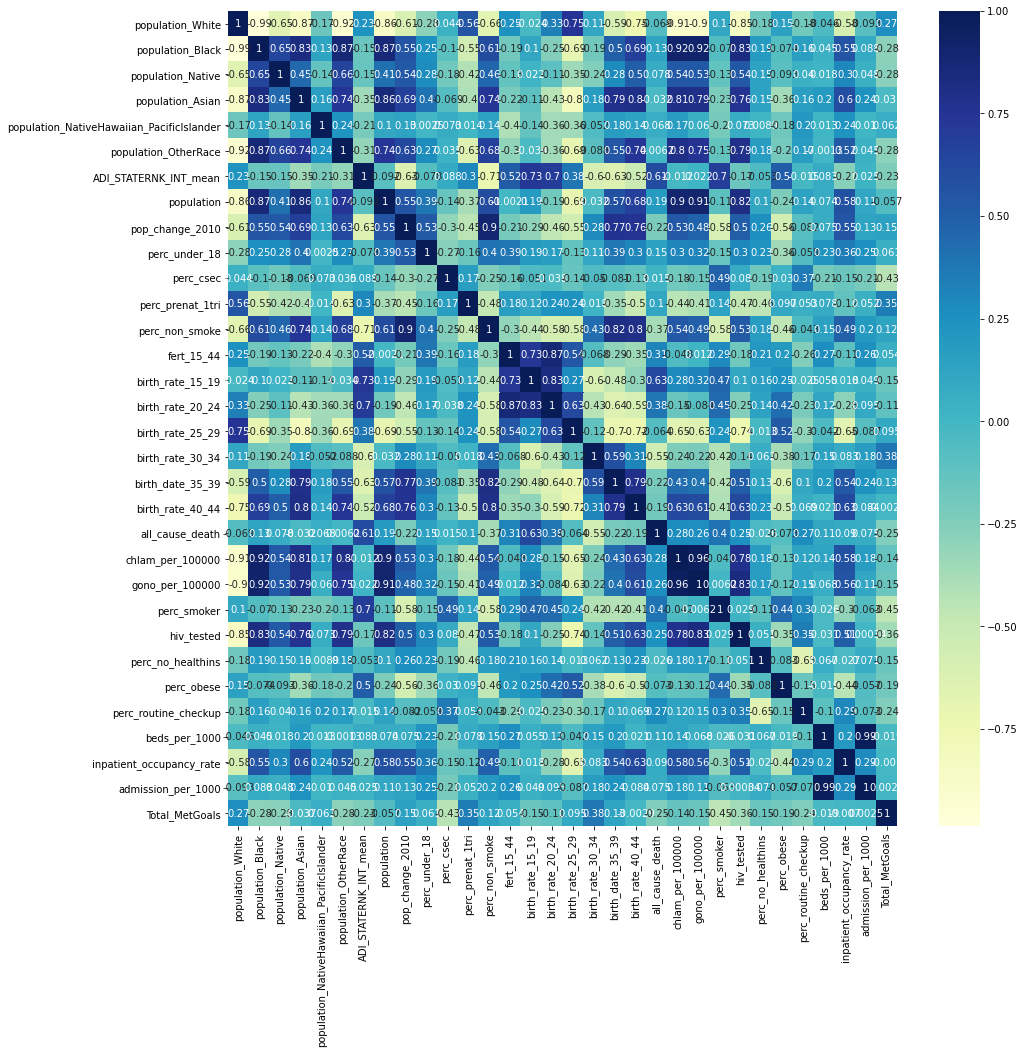

In [123]:
fig, ax = plt.subplots(figsize=(15,15)) 
heatmap = sns.heatmap(merged.corr(), cmap="YlGnBu", annot=True)

### Building Models

##### Baseline Model
Below, we build several models. The first is a baseline linear regression model using all features.

In [196]:
lm = LinearRegression() #creating linear regression object
lm.fit(X_train, y_train) #fitting train data to model
print("Train R-squared: ", lm.score(X_train, y_train)) #getting train model R-squared
print("Train MSE: %.2f"% mean_squared_error(y_train, lm.predict(X_train))) #getting MSE for train data

cross_val = KFold(n_splits=10, random_state=None, shuffle=False) #creating k-fold cross validation object
score_lm = cross_val_score(lm, X_train, y_train, 
                             scoring="neg_mean_squared_error", cv=cross_val, n_jobs=-1) #getting CV scores for linear regression
lm_MSE_CV = np.abs(np.mean(score_lm)) #getting average CV error for linear regression
print("Linear Regression CV error:", lm_MSE_CV) #printing average CV error for linear regression

Train R-squared:  0.9176343840338334
Train MSE: 0.15
Linear Regression CV error: 0.4337808876497878


##### Manually selected features based on correlation

The next model manually selects features, dropping certain features that are highly correlated with other features.

Train R-squared:  0.9176343840338334
Train MSE: 0.15
Linear Regression CV error: 0.4337808876497878


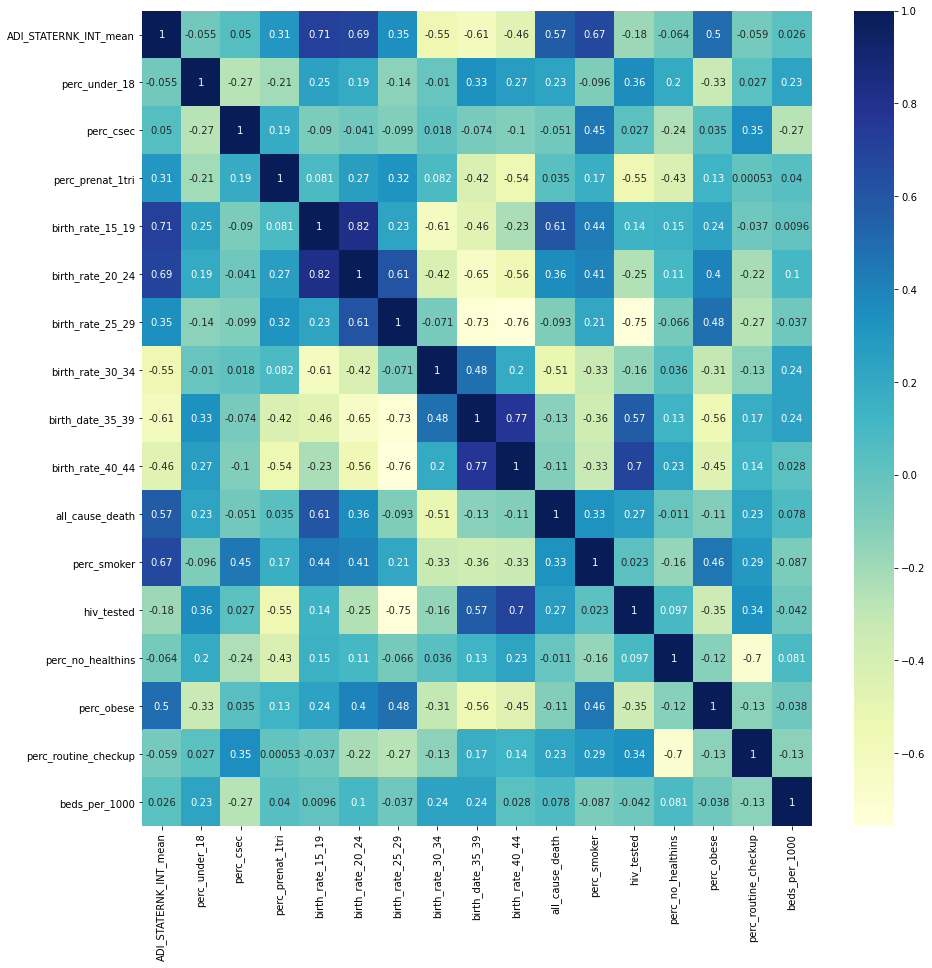

In [203]:
X_train_corr  = X_train.drop(columns = ['population_White', 'perc_non_smoke', 'population_Black', 'population_Native', 'population_Asian', 'population_NativeHawaiian_PacificIslander', 'population_OtherRace', 'admission_per_1000', 'gono_per_100000', 
                                        'chlam_per_100000', 'population', 'fert_15_44', 'pop_change_2010', 'inpatient_occupancy_rate'])
X_test_corr  = X_test.drop(columns = ['population_White', 'perc_non_smoke', 'population_Black', 'population_Native', 'population_Asian', 'population_NativeHawaiian_PacificIslander', 'population_OtherRace', 'admission_per_1000', 'gono_per_100000',
                                      'chlam_per_100000','population', 'fert_15_44', 'pop_change_2010', 'inpatient_occupancy_rate'])

lm = LinearRegression() #creating linear regression object
lm.fit(X_train, y_train) #fitting train data to model
print("Train R-squared: ", lm.score(X_train, y_train)) #getting train model R-squared
print("Train MSE: %.2f"% mean_squared_error(y_train, lm.predict(X_train))) #getting MSE for train data!

cross_val = KFold(n_splits=10, random_state=None, shuffle=False) #creating k-fold cross validation object
score_lm = cross_val_score(lm, X_train, y_train, 
                             scoring="neg_mean_squared_error", cv=cross_val, n_jobs=-1) #getting CV scores for linear regression
lm_MSE_CV_corr = np.abs(np.mean(score_lm)) #getting average CV error for linear regression
print("Linear Regression CV error:", lm_MSE_CV) #printing average CV error for linear regression

fig, ax = plt.subplots(figsize=(15,15)) 
heatmap = sns.heatmap(X_train_corr.corr(), cmap="YlGnBu", annot=True)

##### Forward Selection

The next model uses forward selection to select features. We choose the set of features with the best CV error.

In [127]:
from sklearn.feature_selection import SequentialFeatureSelector
model= LinearRegression(normalize=True) #creating model object
predictors = X_train.columns.values #saving column names of predictors
CV_scores = [] #creating empty list to score average CV errors

for i in range(1, np.shape(X_train)[1]): #looping through n-1 features
    print("Num Features:",i)
    sfs = SequentialFeatureSelector(model, 
                                    n_features_to_select = i, 
                                    direction="forward",
                                    scoring='neg_mean_squared_error',
                                    cv=10) 
    sfs = sfs.fit(X_train, y_train) #selecting i features using training data
    print("\tFeatures selected:", list(predictors[sfs.get_support()])) #getting selected features for given i
    x_subset = sfs.transform(X_train) #transforming predictors dataframe based on selected features
    CV_error = np.mean(cross_val_score(model, x_subset, y_train, cv=10, scoring='neg_mean_squared_error'))
    #getting mean cv score for linear regression fitted to training data with selected features
    CV_scores.append(CV_error) #appending average CV error to CV scores list
    print("\tCV_Error: %10.3f"%CV_error)

Num Features: 1
	Features selected: ['perc_csec']
	CV_Error:     -1.415
Num Features: 2
	Features selected: ['perc_csec', 'perc_prenat_1tri']
	CV_Error:     -1.134
Num Features: 3
	Features selected: ['perc_csec', 'perc_prenat_1tri', 'birth_rate_30_34']
	CV_Error:     -0.917
Num Features: 4
	Features selected: ['perc_csec', 'perc_prenat_1tri', 'birth_rate_30_34', 'beds_per_1000']
	CV_Error:     -0.850
Num Features: 5
	Features selected: ['population_Native', 'perc_csec', 'perc_prenat_1tri', 'birth_rate_30_34', 'beds_per_1000']
	CV_Error:     -0.820
Num Features: 6
	Features selected: ['population_Native', 'pop_change_2010', 'perc_csec', 'perc_prenat_1tri', 'birth_rate_30_34', 'beds_per_1000']
	CV_Error:     -0.799
Num Features: 7
	Features selected: ['population_Native', 'pop_change_2010', 'perc_csec', 'perc_prenat_1tri', 'birth_rate_30_34', 'beds_per_1000', 'inpatient_occupancy_rate']
	CV_Error:     -0.776
Num Features: 8
	Features selected: ['population_Native', 'pop_change_2010', 'p

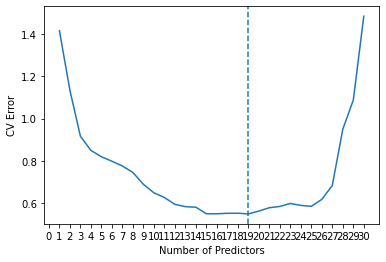

In [128]:
CV_scores =np.abs(CV_scores) #get the absolute value of the CV errors since we used negative MSE above
MSE_LR = np.min(CV_scores) #save the lowest MSE

x_graph = list(range(1,len(predictors))) #store range of features
best_CV = (np.where(CV_scores == np.min(CV_scores))[0])+1 #storing lowest CV error
plt.plot(x_graph,CV_scores) #plotting CV error for each # of features
plt.xlabel("Number of Predictors") #labeling x axis
plt.xticks(range(len(predictors))) #specifying x ticks
plt.ylabel("CV Error") #labeling y axis
plt.axvline(x=best_CV,linestyle='--') #adding vertical line for lowest CV error
plt.show() #showing plot

In [199]:
X_train_fs = X_train[['population_Native', 'population_OtherRace', 'pop_change_2010', 'perc_under_18', 'perc_csec', 'perc_prenat_1tri', 'birth_rate_15_19', 'birth_rate_20_24', 'birth_rate_25_29', 'birth_rate_30_34', 'all_cause_death', 'chlam_per_100000', 'gono_per_100000', 'hiv_tested', 'perc_no_healthins', 'perc_obese', 'beds_per_1000', 'inpatient_occupancy_rate']]

X_test_fs = X_test[['population_Native', 'population_OtherRace', 'pop_change_2010', 'perc_under_18', 'perc_csec', 'perc_prenat_1tri', 'birth_rate_15_19', 'birth_rate_20_24', 'birth_rate_25_29', 'birth_rate_30_34', 'all_cause_death', 'chlam_per_100000', 'gono_per_100000', 'hiv_tested', 'perc_no_healthins', 'perc_obese', 'beds_per_1000', 'inpatient_occupancy_rate']]

In [200]:
lm = LinearRegression() #creating linear regression object
lm.fit(X_train_fs, y_train) #fitting train data to model
print("Train R-squared: ", lm.score(X_train_fs, y_train)) #getting train model R-squared
print("Train MSE: %.2f"% mean_squared_error(y_train, lm.predict(X_train_fs))) #getting MSE for train data


Train R-squared:  0.7807102095627227
Train MSE: 0.41


#### Regularization through Ridge and Lasso

In [131]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
feature_names=X_train.columns.values #storing feature names

model_ridge = Ridge(normalize=True) #creating ridge model object
errors= [] #empty list to store errors
coef = [] #empty list to store coefficient estimates for graphing 


alphas = np.logspace(-5, 5, 300) #setting logspace range for alphas
for a in alphas: #iterating through alphas
    model_ridge.set_params(alpha=a) #setting alpha parameter for ridge model
    model_ridge.fit(X_train, y_train) #fitting model to training data
    CV_error = np.mean(cross_val_score(model_ridge, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    #getting average CV error for specific alpha using training data
    errors.append(CV_error) #storing average CV error in list
    coef.append(model_ridge.coef_) #storing coefficient estimates in list for graphing later
    
errors = np.abs(errors) #storing absolute value of errors bc we used neg MSE above
print("Min error: ", np.min(errors)) #printing min CV error
ridge_ME = np.min(errors) #storing min error for model selection later
index_ME = (np.where(errors == np.min(errors))[0]) #storing index for min CV error to get best alpha
print("Best alpha: ", alphas[index_ME]) #printing best alpha

Min error:  0.7696780417136877
Best alpha:  [0.11138398]


In [133]:
model_lasso = Lasso(normalize=True, max_iter = 100000) #creating lasso model object
errors_lasso = [] #empty list to store errors
coef_lasso = [] #empty list to store coefficient estimates for graphing 

alphas = np.logspace(-5, 5, 300) #setting logspace range for alphas
for a in alphas: #iterating through alphas
    model_lasso.set_params(alpha=a) #setting model parameter to specific alpha
    model_lasso.fit(X_train, y_train) #fitting lasso model to training data
    CV_error = np.mean(cross_val_score(model_lasso, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    #getting mean CV error using training data
    errors_lasso.append(CV_error) #appending mean CV error to list for graphing
    coef_lasso.append(model_lasso.coef_) #appending coefficient weights to list for graphing
    
errors_lasso = np.abs(errors_lasso) #getting asbolute value since negative MSE is used above
print("Min error: ", np.min(errors_lasso)) #printing min error
lasso_ME = np.min(errors_lasso) #storing min error
lasso_index_ME = (np.where(errors_lasso == np.min(errors_lasso))[0])
#storing index of min error to get best alpha
print("Best alpha: ", alphas[lasso_index_ME]) #getting best alpha using index stored in line above

Min error:  0.7454060590049241
Best alpha:  [0.00236909]


##### Model Selection

In [204]:
print('Avg CV MSE for Linear Regression: %.4f'% lm_MSE_CV)
print('Avg CV MSE for Linear Regression with Manual Feature Selection: %.4f'% lm_MSE_CV_corr)
print('Lowest SFS Linear Regression CV MSE, 16 features: %.4f'% MSE_LR)
print('Lowest Ridge CV MSE with best alpha: %.4f'% ridge_ME)
print('Lowest Lasso CV MSE with best alpha: %.4f'% lasso_ME)

Avg CV MSE for Linear Regression: 0.4338
Avg CV MSE for Linear Regression with Manual Feature Selection: 0.4338
Lowest SFS Linear Regression CV MSE, 16 features: 0.5498
Lowest Ridge CV MSE with best alpha: 0.7697
Lowest Lasso CV MSE with best alpha: 0.7454


In [205]:
lm = LinearRegression() #create linear reg object
lm.fit(X_train, y_train) #fitting to training data
lm_model_pred_y = lm.predict(X_test) #using fit model to predict y for test data
lm_model_test_MSE = mean_squared_error(lm_model_pred_y, y_test) #get test MSE
print("Linear Regression Test MSE:", lm_model_test_MSE)

lm = LinearRegression() #create linear reg object
lm.fit(X_train_corr, y_train) #fitting to training data
lm_model_pred_y = lm.predict(X_test_corr) #using fit model to predict y for test data
lm_corr_test_MSE = mean_squared_error(lm_model_pred_y, y_test) #get test MSE
print("Linear Regression Corr Test MSE:", lm_corr_test_MSE)

sfs = SequentialFeatureSelector(model, 
                                n_features_to_select = 19, 
                                direction="forward",
                                scoring='neg_mean_squared_error',
                                cv=10) #create SFS using n=17
sfs = sfs.fit(X_train, y_train) #selecting 5 features using training data
x_subset = sfs.transform(X_train) #transforming x train data
x_subset_test = sfs.transform(X_test) #transforming x test data
lm.fit(x_subset, y_train) #fitting SFS linear model using transformed x train data
y_pred = lm.predict(x_subset_test) #predict y test using transformed x data and fitted model
sfs_MSE = mean_squared_error(y_pred, y_test) #get test MSE
print("SFS Linear Regression Test MSE:", sfs_MSE)

model_ridge.set_params(alpha=alphas[index_ME]) #set params for ridge using best alpha
y_pred = model_ridge.predict(X_test) #predict y using x test data
MSE_test_ridge = mean_squared_error(y_test, y_pred) #get test MSE
print("Ridge Regression Test MSE:", MSE_test_ridge)

model_lasso.set_params(alpha=alphas[lasso_index_ME]) #set params for ridge using best alpha
y_pred = model_lasso.predict(X_test) #predict y using x test data
MSE_test_lasso = mean_squared_error(y_test, y_pred) #get test MSE
print("Lasso Regression Test MSE:", MSE_test_lasso)

Linear Regression Test MSE: 0.4164272706214948
Linear Regression Corr Test MSE: 0.7973696748627422
SFS Linear Regression Test MSE: 0.46422405370485453
Ridge Regression Test MSE: 1.945352222994765
Lasso Regression Test MSE: 1.9454023723561313


In [206]:
import statsmodels.api as sm
from regressors import stats
import itertools

In [207]:
lm = LinearRegression()
lm.fit(X_train_corr, y_train)

coefs = []
coefs.append(lm.intercept_)
for coef in lm.coef_:
    coefs.append(coef)

pd.DataFrame(zip(X_train_corr.columns, coefs, stats.coef_pval(lm, X_train_corr, y_train)), columns = ['feature', 'coefficient estimate', 'p-value'])

,feature,coefficient estimate,p-value
0,ADI_STATERNK_INT_mean,45.569513,4.864765e-09
1,perc_under_18,-0.316269,3.172552e-03
2,perc_csec,0.015471,7.138647e-01
3,perc_prenat_1tri,-0.201928,5.646594e-13
4,birth_rate_15_19,0.021621,7.035189e-02
5,birth_rate_20_24,0.195817,6.588063e-13
6,birth_rate_25_29,-0.014218,8.194361e-04
7,birth_rate_30_34,-0.028463,2.102095e-07
8,birth_date_35_39,0.026619,1.074990e-03
9,birth_rate_40_44,0.062678,5.169344e-05


In [208]:
lm = LinearRegression()
lm.fit(X_train_fs, y_train)

coefs = []
coefs.append(lm.intercept_)
for coef in lm.coef_:
    coefs.append(coef)

pd.DataFrame(zip(X_train_fs.columns, coefs, stats.coef_pval(lm, X_train_fs, y_train)), columns = ['feature', 'coefficient estimate', 'p-value'])

,feature,coefficient estimate,p-value
0,population_Native,19.995630,4.078626e-11
1,population_OtherRace,-4.671714,1.753459e-06
2,pop_change_2010,0.338478,2.706752e-05
3,perc_under_18,0.140037,1.572247e-05
4,perc_csec,-0.049008,1.964159e-01
5,perc_prenat_1tri,-0.229459,0.000000e+00
6,birth_rate_15_19,0.072927,1.082132e-10
7,birth_rate_20_24,0.040496,1.734460e-01
8,birth_rate_25_29,0.008382,3.079747e-02
9,birth_rate_30_34,-0.023591,1.287956e-05
